# Regression analysis on US data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import copy

# import custom functions in myFunctions.ipynb
import ipynb.fs.defs.myFunctions as myFun

In [2]:
# load merged data
us = pd.read_pickle("Data/US_gnc_gdp_pop2016")
# select subset of columns
us = us[["city_gnc", "gncAbs", "gdp2016", "msa_gdp", "pop2016"]]

## A. Build OLS models

In [3]:
us = myFun.clean_data(us, ["pop2016", "gdp2016", "gncAbs"])

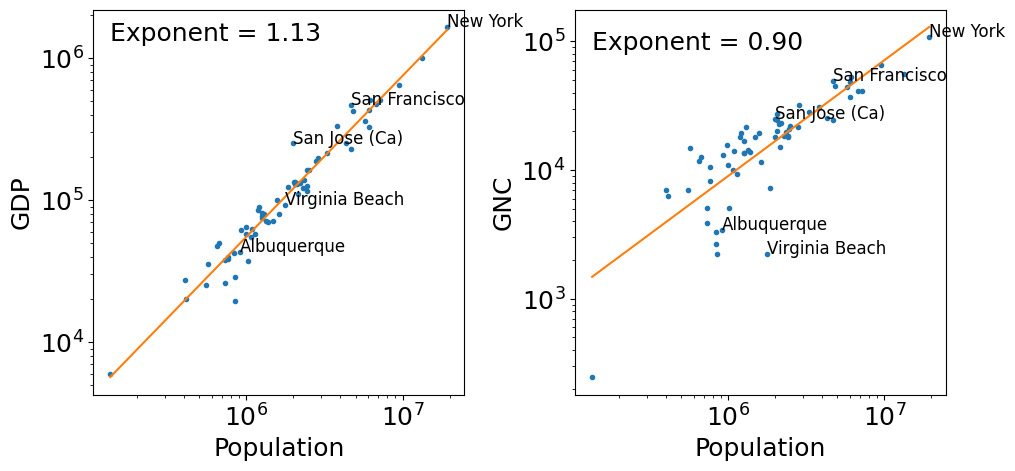

In [4]:
# plot scaling relationship to check. 
selected_cities = [ "New York", "San Francisco",  "Albuquerque", "San Jose (Ca)", "Virginia Beach"]
out = myFun.plot_descriptives(us, "pop2016", "gdp2016", "gncAbs", "city_gnc", selected_cities, "Population", "GDP", "GNC", ".")

In [5]:
stats.pearsonr(np.log(us.pop2016), np.log(us.gncAbs))

PearsonRResult(statistic=0.8293274999050447, pvalue=7.907678936133508e-18)

## Run various regression models

In [6]:
# null model: log Y = beta log N + c
outUS1 = myFun.run_null_model(us, "pop2016", "gdp2016")

In [7]:
outUS1

{'params': const     -4.731721
 pop2016    1.132957
 dtype: float64,
 'aic': -5.9696636913296,
 'bic': -1.59035420727675,
 'CI95':                 0         1
 const   -5.641789 -3.821652
 pop2016  1.069821  1.196092,
 'r_sq': 0.9525628143587062,
 'r_sq_adj': 0.951821608333061,
 'standar_err': const      0.455551
 pop2016    0.031604
 dtype: float64}

In [10]:
# GNC model: log Y = beta log N + alpha log GNC + c. 
outUS2 = myFun.run_gnc_model(us, "pop2016", "gncAbs", "gdp2016")

In [11]:
outUS2

{'params': const     -3.968741
 pop2016    0.926566
 gncAbs     0.229355
 dtype: float64,
 'aic': -27.746639672703793,
 'bic': -21.17767544662452,
 'CI95':                 0         1
 const   -4.788677 -3.148806
 pop2016  0.831425  1.021708
 gncAbs   0.141672  0.317038,
 'r_sq': 0.9669127101398923,
 'r_sq_adj': 0.9658623199856032,
 'standar_err': const      0.410308
 pop2016    0.047610
 gncAbs     0.043878
 dtype: float64}